### Importing the required libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Defining the Input Images

In [112]:
ps = np.zeros((3, 63))
ps[0] = np.array([
    -1, -1, -1, 1, -1, -1, -1, 
    -1, -1, -1, 1, -1, -1, -1, 
    -1, -1, -1, 1, -1, -1, -1, 
    -1, -1, 1, -1, 1, -1, -1, 
    -1, -1, 1, -1, 1, -1, -1, 
    -1, 1, 1, 1, 1, 1, -1, 
    -1, 1, -1, -1, -1, 1, -1, 
    -1, 1, -1, -1, -1, 1, -1, 
    1, 1, 1, -1, 1, 1, 1
])
ps[1] = np.array([
    1, 1, 1, 1, 1, 1, 1, 
    1, -1, -1, -1, -1, -1, 1,
    1, -1, -1, -1, -1, 1, -1,
    1, -1, -1, -1, 1, -1, -1,
    1, 1, 1, 1, -1, -1, -1,
    1, -1, -1, -1, 1, -1, -1,
    1, -1, -1, -1, -1, 1, -1,
    1, -1, -1, -1, -1, -1, 1,
    1, 1, 1, 1, 1, 1, 1, 
])
ps[2] = np.array([
    -1, -1, 1, 1, 1, 1, -1, 
    -1, 1, -1, -1, -1, -1, 1,
    1, -1, -1, -1, -1, -1, -1,
    1, -1, -1, -1, -1, -1, -1,
    1, -1, -1, -1, -1, -1, -1,
    1, -1, -1, -1, -1, -1, -1,
    1, -1, -1, -1, -1, -1, -1,
    -1, 1, -1, -1, -1, -1, 1,
    -1, -1, 1, 1, 1, 1, -1, 
])

### Defining the Output Images

In [113]:
ts = np.zeros((3, 15))
ts[0] = np.array([
    -1, 1, -1, 
    1, -1, 1, 
    1, 1, 1,
    1, -1, 1,
    1, -1, 1,
])
ts[1] = np.array([
    1, 1, -1, 
    1, -1, 1,
    1, 1, -1,
    1, -1, 1,
    1, 1, -1,
])
ts[2] = np.array([
    -1, 1, 1,
    1, -1, -1,
    1, -1, -1,
    1, -1, -1,
    -1, 1, 1
])

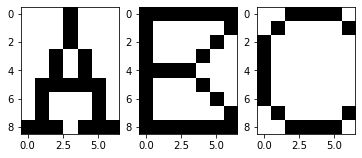

In [114]:
fig, axs = plt.subplots(nrows=1, ncols=3)
for i in range(3):
    axs[i].imshow(ps[i].reshape((9, 7)), cmap=plt.cm.gray_r)

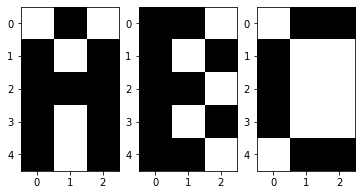

In [115]:
fig, axs = plt.subplots(nrows=1, ncols=3)
for i in range(3):
    axs[i].imshow(ts[i].reshape((5, 3)), cmap=plt.cm.gray_r)

In [116]:
weights = np.zeros((63, 15))
for i in range(3):
    a = ps[i]
    b = ts[i]
    a = np.expand_dims(a, 1)
    b = np.expand_dims(b, 1)
    weights += np.matmul(a, b.T)

In [117]:
def activation_function(a):
    if a > 0:
        return 1
    else:
        return -1
activation_function = np.vectorize(activation_function)

In [118]:
def predict(a, weights):
    a = a.copy()
    a = np.expand_dims(a, 1)
    z = np.matmul(a.T, weights)
    z = np.squeeze(z, 0)
    a = activation_function(z)
    return a

In [119]:
for i in range(3):
    a = predict(ps[i], weights)
    print((a == ts[i]).all())

True
True
True


### Add Noise to the Data

In [120]:
def add_noise(a, prob, zero=False):
    a = a.copy()
    choices = np.random.choice(np.arange(a.shape[0]), size=int(prob*a.shape[0]), replace=False)
    for choice in choices:
        if zero:
            a[choice] = 0
        else:
            a[choice] *= -1
    return a

In [121]:
nepochs = 100
probs = [.1, .25, .4]
for make_zero in [False, True]:
    for prob in probs:
        result = 0
        for epoch in range(nepochs):
            for i in range(3):
                a = add_noise(ps[i], prob, make_zero)
                a = predict(a, weights)
                if (a == ts[i]).all():
                    result += 1
        print('results for probability of noise {} and condition of making zeros {}: {}'.format(
            prob, 
            make_zero, 
            np.round(result /3/nepochs, 3)
        ))

results for probability of noise 0.1 and condition of making zeros False: 1.0
results for probability of noise 0.25 and condition of making zeros False: 0.963
results for probability of noise 0.4 and condition of making zeros False: 0.467
results for probability of noise 0.1 and condition of making zeros True: 1.0
results for probability of noise 0.25 and condition of making zeros True: 1.0
results for probability of noise 0.4 and condition of making zeros True: 1.0
